In [1]:
# 服装分类
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

In [2]:
# 加载数据
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 607s 137us/step


In [4]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [6]:
# 数据清洗
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [14]:

# 建立模型
network = tf.keras.Sequential()
network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = network.fit(train_images, train_labels, epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 5s 11ms/step - loss: 0.5582 - accuracy: 0.8040
Epoch 2/100
469/469 [==============================] - 6s 13ms/step - loss: 0.3826 - accuracy: 0.8599
Epoch 3/100
469/469 [==============================] - 8s 16ms/step - loss: 0.3361 - accuracy: 0.8768
Epoch 4/100
469/469 [==============================] - 4s 10ms/step - loss: 0.3085 - accuracy: 0.8861
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2903 - accuracy: 0.8914
Epoch 6/100
469/469 [==============================] - 5s 10ms/step - loss: 0.2770 - accuracy: 0.8972
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.2638 - accuracy: 0.9028
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2542 - accuracy: 0.9060
Epoch 9/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2415 - accuracy: 0.9104
Epoch 10/100
469/469 [==============================] - 6s 13ms/step - loss: 0.2338 

In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.0246 - accuracy: 0.8971
test_acc: 0.8970999717712402


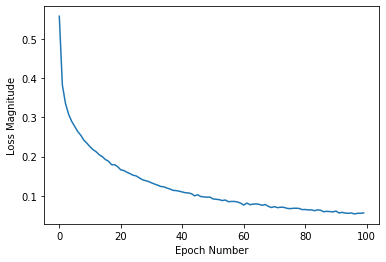

In [16]:
# 画图
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()